# MobileNet on Alpaca Dataset

## About MobileNet

### Overall Structure
![](images/MobileNet/mobilenet.png)

### Depthwise
![](images/MobileNet/depthwise.png)

### Pointwise
![](images/MobileNet/pointwise.png)

### Number of operations comparision

* Convolution

$$3 \times 3 \times 3 \times 4 \times 4 \times 5 = 2160$$

* MobileNet
$$3 \times 3 \times 4 \times 4 \times 3 + 4 \times 4 \times 5 \times 3 = 672$$

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

2023-07-29 02:19:55.989232: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load Data

In [2]:
IMAGE_SIZE = (160, 160)
IMAGE_SHAPE = (160, 160, 3)
BATCH_SIZE = 32
DATA_PATH = 'datasets/Alpaca'

train_dataset = image_dataset_from_directory(DATA_PATH,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=0)

validation_dataset = image_dataset_from_directory(DATA_PATH,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=0)

Found 327 files belonging to 2 classes.
Using 262 files for training.
Found 327 files belonging to 2 classes.
Using 65 files for validation.


2023-07-29 02:19:57.321939: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-29 02:19:57.321992: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
class_names = train_dataset.class_names
print(f"dataset classes names are {class_names}")

dataset classes names are ['alpaca', 'not alpaca']


In [4]:
# relate lables to classes names

for images, labels in train_dataset.take(1):
    for i in range(5):
        print(f"Label {labels[i]} is class {class_names[labels[i]]}")

2023-07-29 02:19:57.473510: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [262]
	 [[{{node Placeholder/_0}}]]
2023-07-29 02:19:57.473787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [262]
	 [[{{node Placeholder/_4}}]]


Label 0 is class alpaca
Label 0 is class alpaca
Label 0 is class alpaca
Label 0 is class alpaca
Label 1 is class not alpaca


In [ ]:
# show image
for images , labels in train_dataset.take(1):
    plt.imshow(images[0].numpy().astype('uint8'))
    plt.title(class_names[labels[0]])
    break

2023-07-29 02:19:57.842323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [262]
	 [[{{node Placeholder/_4}}]]
2023-07-29 02:19:57.842556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [262]
	 [[{{node Placeholder/_4}}]]


In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

## Data Augmentation

2023-07-29 02:19:58.392573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [262]
	 [[{{node Placeholder/_0}}]]
2023-07-29 02:19:58.392829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [262]
	 [[{{node Placeholder/_0}}]]


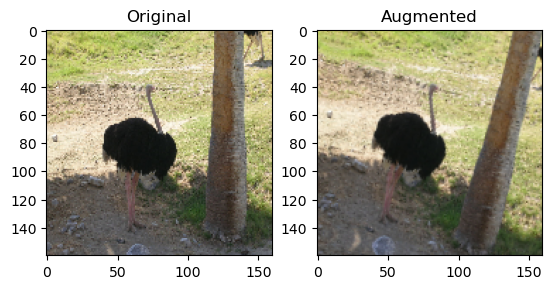

In [7]:
def data_augmentation():
   
    return tf.keras.Sequential([
        RandomFlip('horizontal'),
        RandomRotation(0.2)
    ])

data_augmenter = data_augmentation()

for images, labels in train_dataset.take(1):
    plt.subplot(1, 2, 1)
    plt.imshow(images[0].numpy().astype('uint8'))
    plt.title("Original")
    augmented_image = data_augmenter(images[0])
    plt.subplot(1, 2, 2)
    plt.imshow(augmented_image.numpy().astype('uint8'))
    plt.title("Augmented")

## Build Model
* Use Original Model Directly (include top)
* Self-Defined Model (does not include top)

### Use Original Model

In [8]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMAGE_SHAPE,
                                               include_top=True,
                                               weights='imagenet')
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [9]:
image_batch , _ = next(iter(train_dataset))

# before making predictions, preprocess the data
preprocessed_image_batch = tf.keras.applications.mobilenet_v2.preprocess_input(image_batch)

# make predictions
yhat = base_model(preprocessed_image_batch)

# check the shape of predictions
print(f"predictions shape is {yhat.shape}")

2023-07-29 02:20:00.722540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [262]
	 [[{{node Placeholder/_0}}]]
2023-07-29 02:20:00.722780: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [262]
	 [[{{node Placeholder/_0}}]]


predictions shape is (32, 1000)


* 32 means that there are 32 images in a batch
* 1000 means the probabilities of 1000 classes

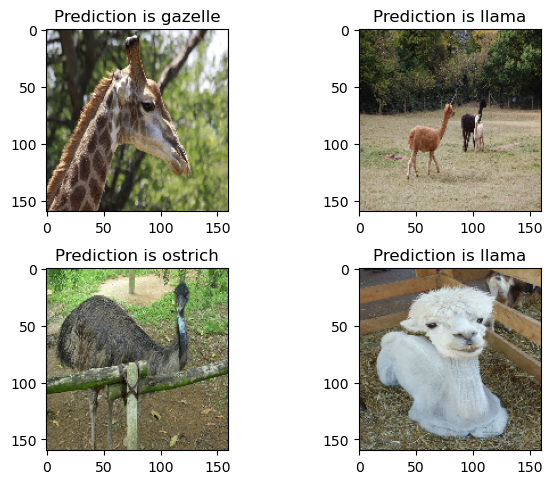

In [10]:
# decode the predictions
# only select the top 5 predictions
decoded_yhat = tf.keras.applications.mobilenet_v2.decode_predictions(yhat.numpy(), 
                                                      top=5)

fig, ax = plt.subplots(2, 2)
fig.tight_layout(h_pad = 2)

# display first 4 images and predictions
ax[0,0].set_title("Prediction is " + decoded_yhat[0][0][1])
ax[0,0].imshow(image_batch[0].numpy().astype('uint8'))

ax[0,1].set_title("Prediction is " + decoded_yhat[1][0][1])
ax[0,1].imshow(image_batch[1].numpy().astype('uint8'))

ax[1,0].set_title("Prediction is " + decoded_yhat[2][0][1])
ax[1,0].imshow(image_batch[2].numpy().astype('uint8'))

ax[1,1].set_title("Prediction is " + decoded_yhat[3][0][1])
ax[1,1].imshow(image_batch[3].numpy().astype('uint8'))

### Self Defined Final Layers

In [11]:
def mymodel(input_shape, data_augmenter):
    
    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False,
                                                   weights='imagenet')
    
    # freeze all the parameters
    base_model.trainable = False
    
    # input layer
    inputs = tf.keras.Input(shape=input_shape) 
    
    # apply data augmentation
    x = data_augmenter(inputs)
    
    # image preprocessing
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
    
    # mobile net
    x = base_model(x, training=False) 
    
    # self defined layers
    x = tfl.GlobalAveragePooling2D()(x) 
    x = tfl.Dropout(0.2)(x)
    outputs = tfl.Dense(units = 1)(x)
    
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [12]:
alpaca_classifier = mymodel(IMAGE_SHAPE, data_augmentation())
alpaca_classifier.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

In [13]:
mnet = alpaca_classifier.layers[4]
print(f"{len(mnet.layers)} Layers in MobileNet")

154 Layers in MobileNet


In [14]:
'''
Unfreeze last 24 layers since they can represent more 
detailed features about alpaca
'''
mnet.trainable = True
for idx , layer in enumerate(mnet.layers):
    if idx < 120:
        layer.trainable = None

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss_function = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = ['accuracy']

alpaca_classifier.compile(optimizer=optimizer, 
                          loss=loss_function, 
                          metrics=metrics)

alpaca_classifier.fit(train_dataset,
                      epochs=10,
                      validation_data=validation_dataset)

Epoch 1/10


2023-07-29 02:20:05.028508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-29 02:20:05.292083: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


9/9 [==============================] - ETA: 0s - loss: 0.6095 - accuracy: 0.6794

2023-07-29 02:20:08.066287: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [65]
	 [[{{node Placeholder/_4}}]]
2023-07-29 02:20:08.066521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [65]
	 [[{{node Placeholder/_0}}]]
2023-07-29 02:20:08.319324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 6s 339ms/step - loss: 0.6095 - accuracy: 0.6794 - val_loss: 0.6363 - val_accuracy: 0.5692
Epoch 2/10
9/9 [==============================] - 1s 100ms/step - loss: 0.4551 - accuracy: 0.7710 - val_loss: 0.3301 - val_accuracy: 0.7385
Epoch 3/10
9/9 [==============================] - 1s 97ms/step - loss: 0.3200 - accuracy: 0.8321 - val_loss: 0.2259 - val_accuracy: 0.9385
Epoch 4/10
9/9 [==============================] - 1s 93ms/step - loss: 0.1715 - accuracy: 0.9389 - val_loss: 0.1660 - val_accuracy: 0.9385
Epoch 5/10
9/9 [==============================] - 1s 93ms/step - loss: 0.2370 - accuracy: 0.9046 - val_loss: 0.2086 - val_accuracy: 0.9231
Epoch 6/10
9/9 [==============================] - 1s 93ms/step - loss: 0.1916 - accuracy: 0.9198 - val_loss: 0.2110 - val_accuracy: 0.9385
Epoch 7/10
9/9 [==============================] - 1s 92ms/step - loss: 0.1614 - accuracy: 0.9389 - val_loss: 0.1289 - val_accuracy: 0.9385
Epoch 8/10
9/9 [====================

<Axes: >

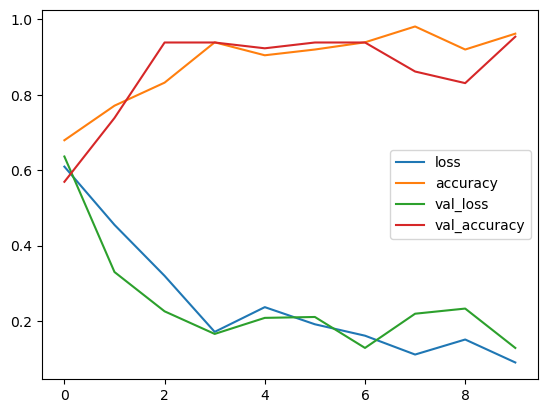

In [16]:
model_loss = pd.DataFrame(alpaca_classifier.history.history)
model_loss.plot()

In [17]:
alpaca_classifier.evaluate(validation_dataset)

3/3 [==============================] - 0s 50ms/step - loss: 0.1289 - accuracy: 0.9538


[0.1289002150297165, 0.9538461565971375]